# Breast Cancer Coimbra Dataset

In [4]:
# UNCOMMENT THE CODE BELOW TO INSTALL THE NEEDED PACKAGES

# !pip install -r requirements.txt

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [41]:
dataset = pd.read_csv('dataR2.csv')

In [42]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


## Brief description

In [43]:
print("Number of observations: " + str(dataset.shape[0]))
print("Number of predictor variables: " + str(dataset.shape[1]))
print("Number of classes: " + str(dataset.Classification.unique().shape[0]))
print("Number of Class 1 samples (Healthy): " + str(dataset.Classification.value_counts()[1]))
print("Number of Class 2 samples (Patients): " + str(dataset.Classification.value_counts()[2]))

Number of observations: 116
Number of predictor variables: 10
Number of classes: 2
Number of Class 1 samples (Healthy): 52
Number of Class 2 samples (Patients): 64


## Unconditional mono-variate analysis

In [44]:
def custom_describe(dataset):
    df = dataset.drop(columns=['Classification']).describe().T
    df = df.drop(columns=['count'])
    df['skewness'] = dataset.drop(columns=['Classification']).skew(axis=0).values
    df['maxmin_ratio'] = df['max']/df['min']
    return df

custom_describe(dataset)

,mean,std,min,25%,50%,75%,max,skewness,maxmin_ratio
Age,57.301724,16.112766,24.000000,45.000000,56.000000,71.000000,89.000000,0.017832,3.708333
BMI,27.582111,5.020136,18.370000,22.973205,27.662416,31.241442,38.578759,0.170152,2.100096
Glucose,97.793103,22.525162,60.000000,85.750000,92.000000,102.000000,201.000000,2.593305,3.350000
Insulin,10.012086,10.067768,2.432000,4.359250,5.924500,11.189250,58.460000,2.577568,24.037829
HOMA,2.694988,3.642043,0.467409,0.917966,1.380939,2.857787,25.050342,3.812087,53.594089
Leptin,26.615080,19.183294,4.311000,12.313675,20.271000,37.378300,90.280000,1.309536,20.941777
Adiponectin,10.180874,6.843341,1.656020,5.474282,8.352692,11.815970,38.040000,1.817765,22.970737
Resistin,14.725966,12.390646,3.210000,6.881763,10.827740,17.755207,82.100000,2.577429,25.576324
MCP.1,534.647000,345.912663,45.843000,269.978250,471.322500,700.085000,1698.440000,1.424436,37.049059


### Unconditional Histogram

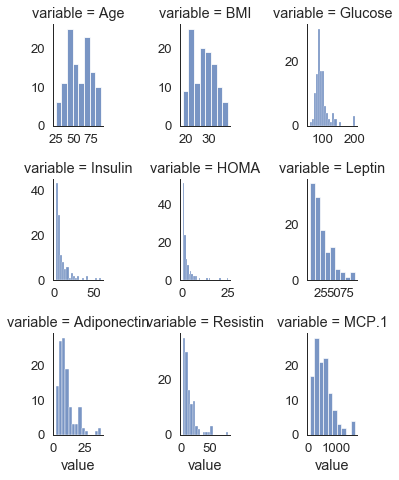

In [45]:
df = dataset.drop(columns=['Classification'])

g = sns.FacetGrid(df.melt(), col="variable", col_wrap=3, sharex=False, sharey=False, height=2.3, aspect=.8)
g.map(sns.histplot, "value")

In [46]:
dataset.melt(id_vars='Classification')

,Classification,variable,value
0,1,Age,48.00
1,1,Age,83.00
2,1,Age,82.00
3,1,Age,68.00
4,1,Age,86.00
...,...,...,...
1039,2,MCP.1,268.23
1040,2,MCP.1,330.16
1041,2,MCP.1,314.05
1042,2,MCP.1,392.46


## Class-conditional mono-variate analysis

### Class 1 (Healthy)

In [47]:
custom_describe(dataset[dataset.Classification == 1])

,mean,std,min,25%,50%,75%,max,skewness,maxmin_ratio
Age,58.076923,18.957999,24.000000,41.750000,65.000000,75.000000,89.000000,-0.276151,3.708333
BMI,28.317336,5.427465,18.670000,23.096003,27.694389,32.328091,38.578759,0.151559,2.066350
Glucose,88.230769,10.191529,60.000000,82.750000,87.000000,93.250000,118.000000,0.301636,1.966667
Insulin,6.933769,4.859793,2.707000,4.304000,5.483500,7.001000,26.211000,2.413932,9.682675
HOMA,1.552398,1.218256,0.467409,0.879510,1.139683,1.774561,7.111918,2.692540,15.215631
Leptin,26.637933,19.334699,4.311000,11.845750,21.494850,36.721600,83.482100,1.151947,19.364904
Adiponectin,10.328205,7.631281,2.194280,5.454286,8.127775,10.820219,38.040000,2.089041,17.335983
Resistin,11.614813,11.447053,3.291750,6.597523,8.929190,12.808525,82.100000,4.796060,24.941141
MCP.1,499.730692,292.242157,45.843000,260.736500,471.322500,642.933500,1256.083000,0.742072,27.399668


### Class 2 (Patient)

In [48]:
custom_describe(dataset[dataset.Classification == 2])

,mean,std,min,25%,50%,75%,max,skewness,maxmin_ratio
Age,56.671875,13.493155,34.000000,45.000000,53.000000,68.000000,86.000000,0.531831,2.529412
BMI,26.984740,4.620398,18.370000,22.788722,27.408027,30.810069,37.109375,0.055525,2.020108
Glucose,105.562500,26.557440,70.000000,92.000000,98.500000,109.000000,201.000000,2.156944,2.871429
Insulin,12.513219,12.317738,2.432000,4.406000,7.580000,16.063000,58.460000,1.960328,24.037829
HOMA,3.623342,4.588943,0.507936,1.036842,2.052256,4.461312,25.050342,2.910505,49.317910
Leptin,26.596512,19.212451,6.333900,12.402925,18.877650,37.378300,90.280000,1.470572,14.253462
Adiponectin,10.061167,6.189466,1.656020,5.484117,8.446438,12.254740,33.750000,1.372757,20.380189
Resistin,17.253777,12.636979,3.210000,8.113675,14.371825,22.965170,55.215300,1.526136,17.201028
MCP.1,563.016500,384.001622,90.090000,299.188250,465.374000,737.762500,1698.440000,1.568762,18.852703


### Class-conditional histogram

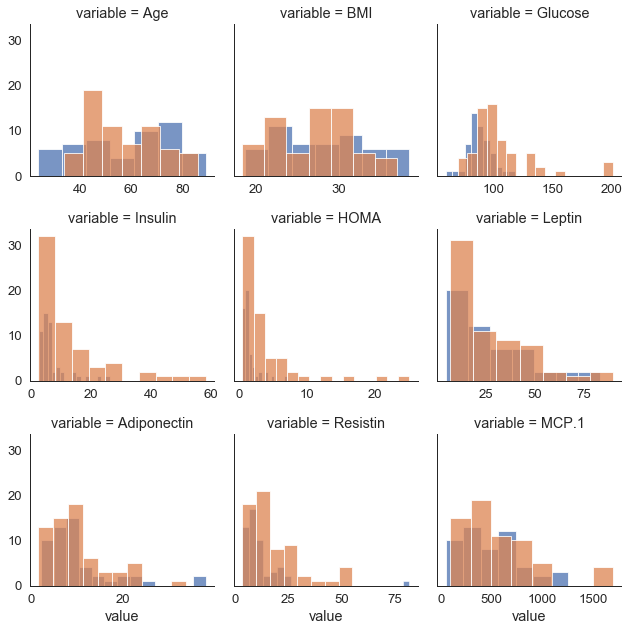

In [50]:
df = dataset
df["Classification"] = df["Classification"].astype(str)
df["Classification"] = df["Classification"].replace({
    "1": "Healthy",
    "2": "Patient"
})

g = sns.FacetGrid(df.melt(id_vars="Classification"), col="variable", hue="Classification", col_wrap=3, sharex=False)
g.map(sns.histplot, "value")

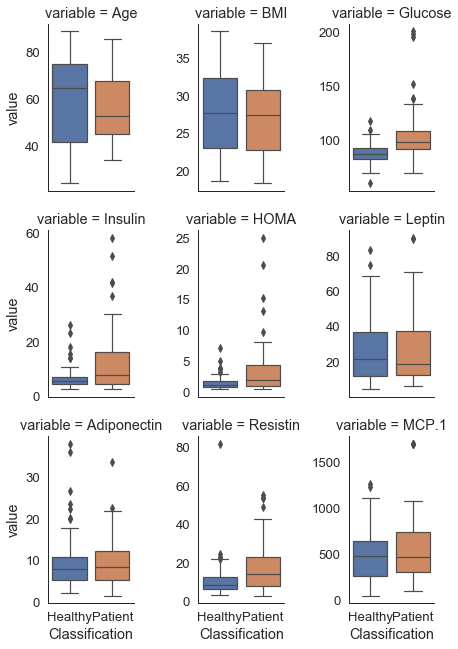

In [51]:
df = dataset.melt(id_vars='Classification')
df["Classification"] = df["Classification"].astype(str)
df["Classification"] = df["Classification"].str.replace('1', 'Healthy')
df["Classification"] = df["Classification"].str.replace('2', 'Patient')

g = sns.catplot(x="Classification",
                y="value",
                col="variable", 
                data=df, 
                kind='box',
                sharey=False,
                col_wrap=3, height=3, aspect=.7)

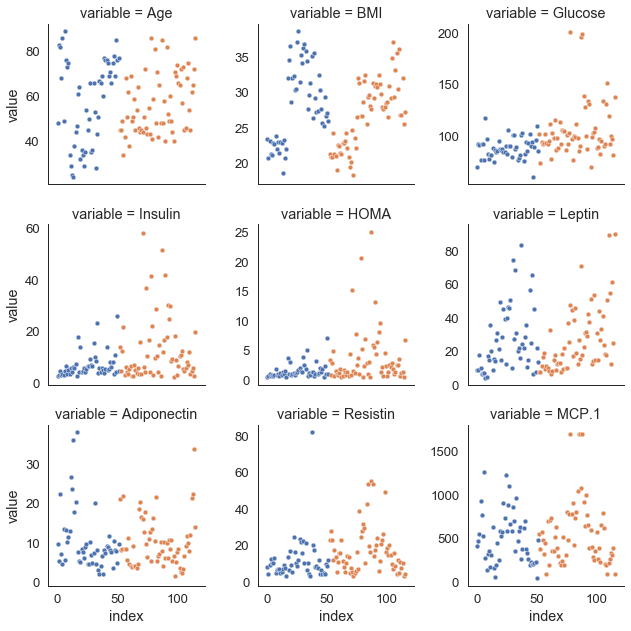

In [52]:
df = dataset
df["Classification"] = df["Classification"].astype(str)
df["Classification"] = df["Classification"].replace({
    "1": "Healthy",
    "2": "Patient"
})

df = df.reset_index()

g = sns.FacetGrid(df.melt(id_vars=["Classification", "index"]), col="variable", hue="Classification", col_wrap=3, sharey=False)
g.map(sns.scatterplot, "index", "value")

## Unconditional bi-variate analysis

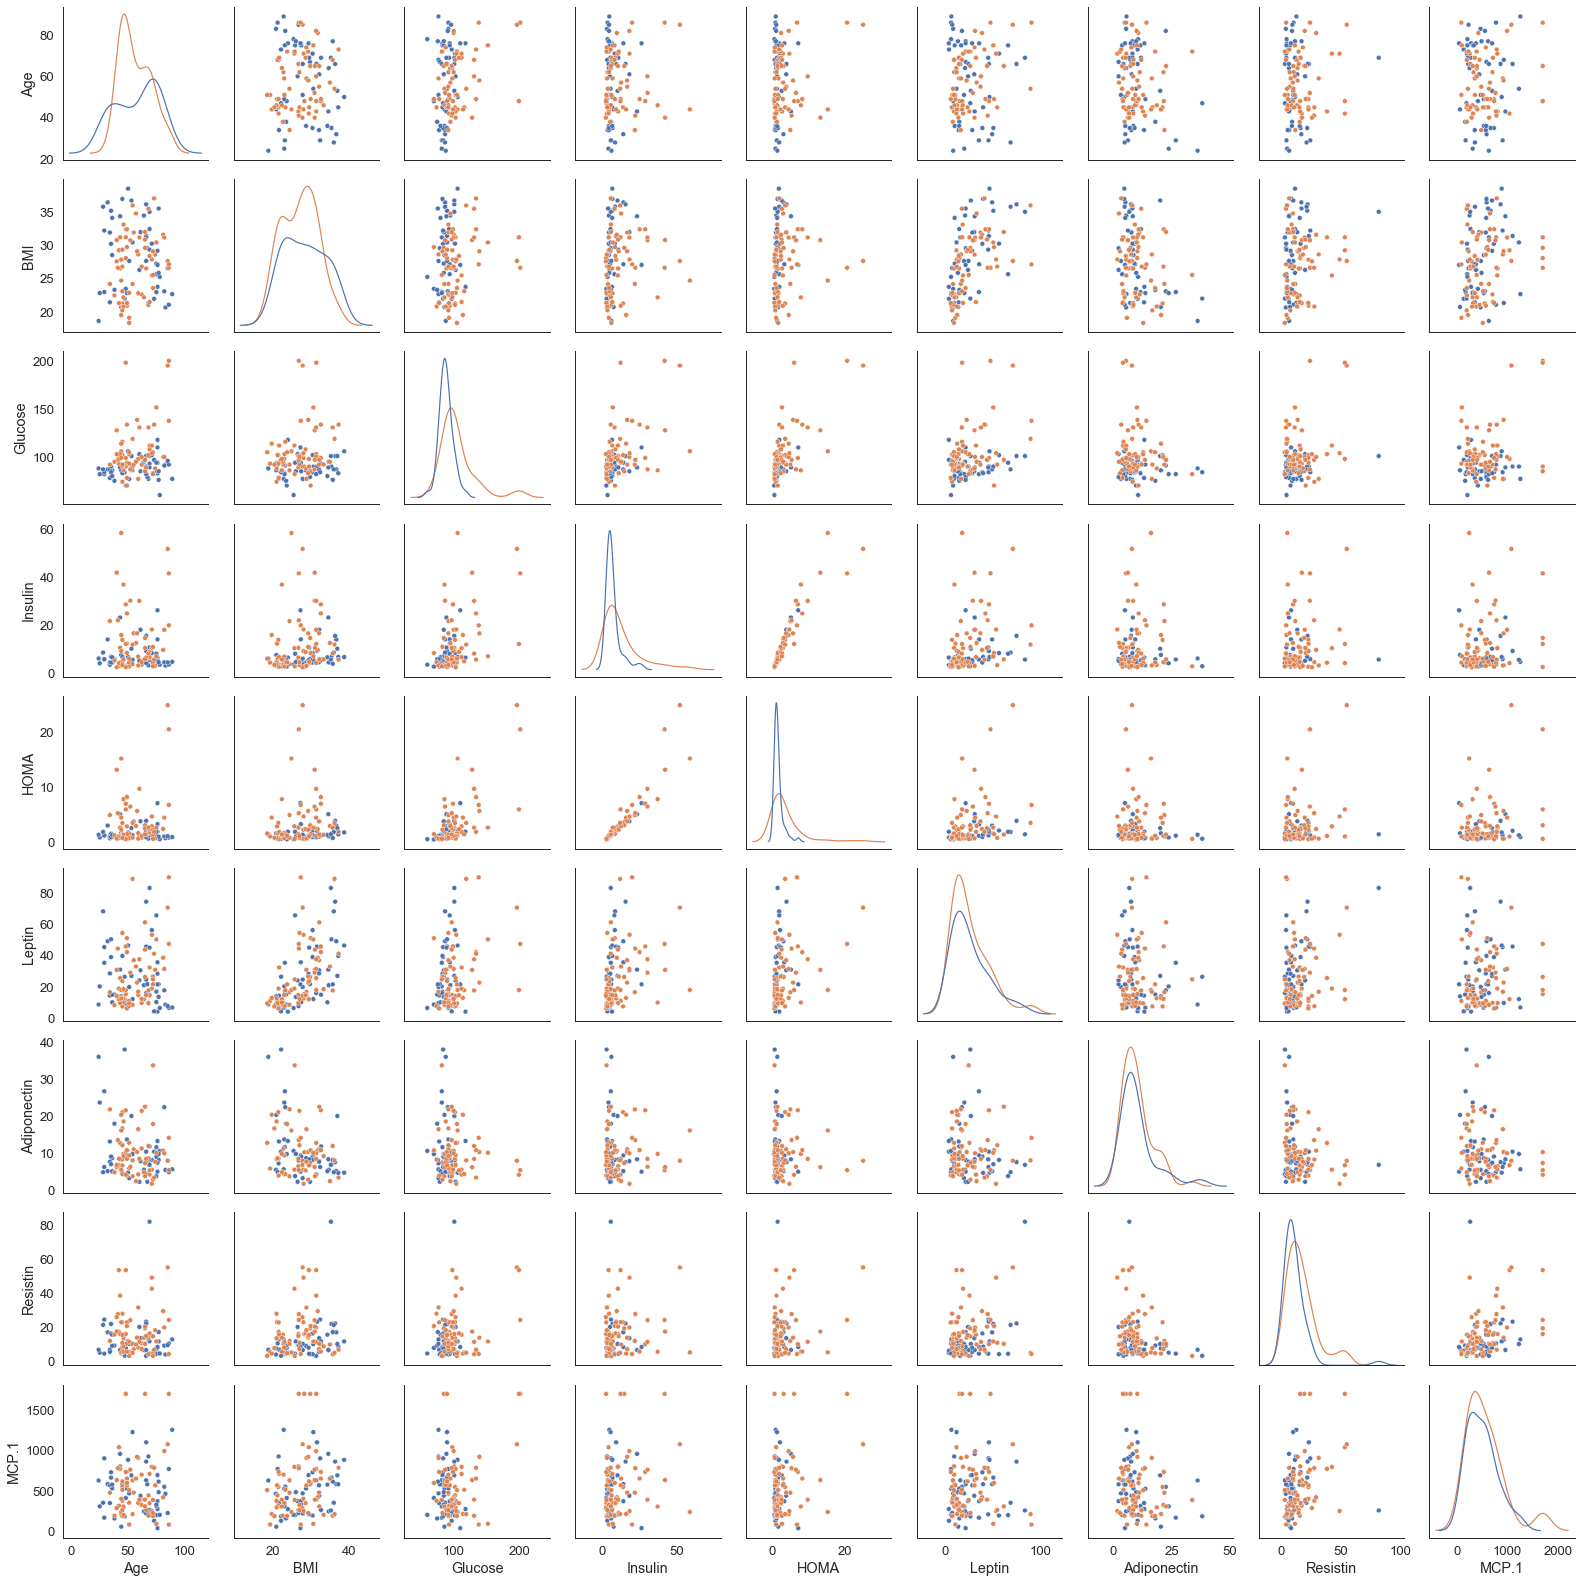

In [53]:
df = dataset

g = sns.PairGrid(df, hue="Classification", diag_sharey=False)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.kdeplot)


In [54]:
df = dataset.drop(columns=['Classification'])

In [55]:
df.corr().round(2)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Age,1.00,0.01,0.23,0.03,0.13,0.10,-0.22,0.00,0.01
BMI,0.01,1.00,0.14,0.15,0.11,0.57,-0.30,0.20,0.22
Glucose,0.23,0.14,1.00,0.50,0.70,0.31,-0.12,0.29,0.26
Insulin,0.03,0.15,0.50,1.00,0.93,0.30,-0.03,0.15,0.17
HOMA,0.13,0.11,0.70,0.93,1.00,0.33,-0.06,0.23,0.26
Leptin,0.10,0.57,0.31,0.30,0.33,1.00,-0.10,0.26,0.01
Adiponectin,-0.22,-0.30,-0.12,-0.03,-0.06,-0.10,1.00,-0.25,-0.20
Resistin,0.00,0.20,0.29,0.15,0.23,0.26,-0.25,1.00,0.37
MCP.1,0.01,0.22,0.26,0.17,0.26,0.01,-0.20,0.37,1.00


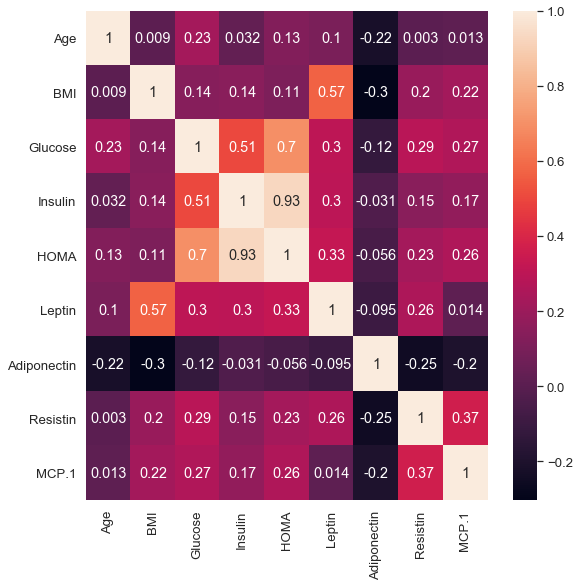

In [56]:
sns.set(font_scale=1.2)
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr().round(3), annot=True, ax=ax)

## unconditional multi-variate analysis

### Columns with high skewness (max to min ratio > 20)

In [57]:
df = custom_describe(dataset)
df = df[df.maxmin_ratio > 20]
columns = df.index.values
for item in columns:
    print(item)

Insulin
HOMA
Leptin
Adiponectin
Resistin
MCP.1


### after box-cox + centering + scaling

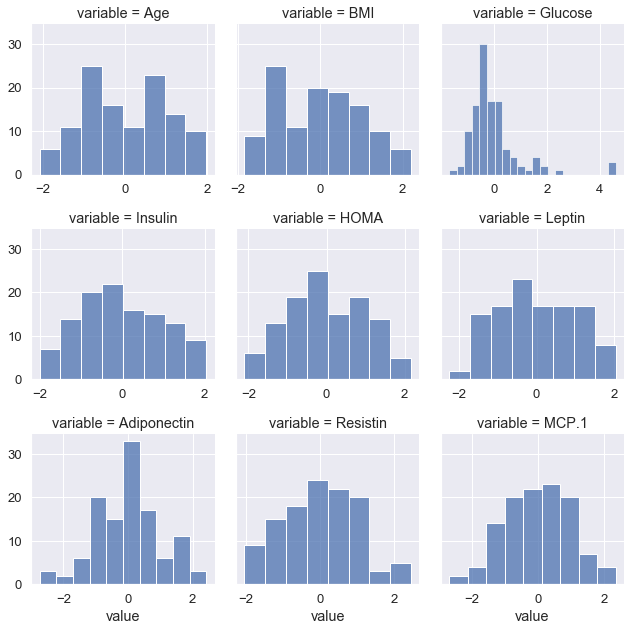

In [58]:
df = dataset

for item in columns:
    df[item] = power_transform(df[item].values.reshape(-1,1), method='box-cox').reshape(1,-1)[0]
    

df = df.drop(columns=['Classification'])

scaler = StandardScaler()
scaler.fit(df)
data = scaler.transform(df)

for i, col in enumerate(df.columns):
    df[col] = data[:,i]


g = sns.FacetGrid(df.melt(), col="variable", col_wrap=3, sharex=False)
g.map(sns.histplot, "value")

In [59]:
pca = PCA(n_components=9)
pca.fit(df)
print(pca.explained_variance_ratio_)

[0.34850616 0.17212979 0.13069406 0.12020305 0.08021751 0.06041637
 0.05495387 0.03209581 0.00078338]


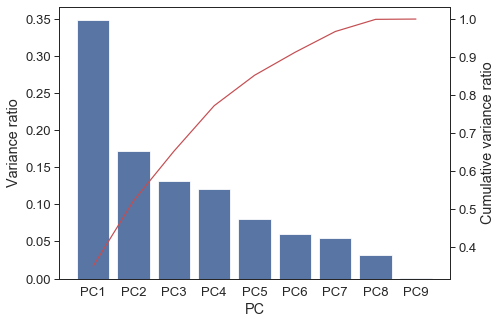

In [67]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)

pca_data = pd.DataFrame({
    'PC': ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'],
    'Variance ratio': pca.explained_variance_ratio_,
    'Cumulative variance ratio': np.cumsum(pca.explained_variance_ratio_)
})

f, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x='PC', y='Variance ratio', data=pca_data, color='b', ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='PC', y='Cumulative variance ratio', data=pca_data, ax=ax2, color='r')


In [56]:
print("Explained variance of 2 first Principal Components: {:.3}".format(np.sum(pca.explained_variance_ratio_[:2])))

Explained variance of 2 first Principal Components: 0.521


In [33]:
pca = PCA(n_components=2)
pca.fit(df)
transformed_df = pd.DataFrame(pca.transform(df))
transformed_df['Classification'] = dataset['Classification']
transformed_df.columns = ['PC0', 'PC1', 'Class']

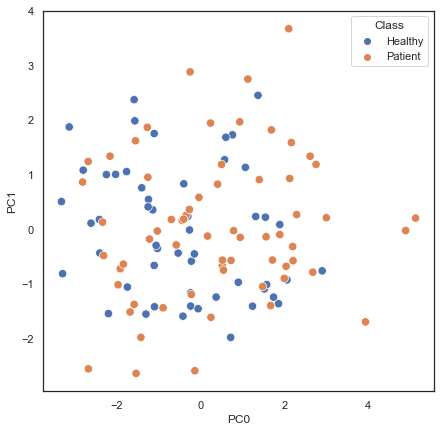

In [65]:
sns.set_context("notebook")

f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=transformed_df, x="PC0", y="PC1", hue="Class", ax=ax, s=70)